In [1]:
from model import ANN, load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
num_iterations = 100
dims=[784, 20, 7, 5, 10]
lr=0.009
batch_size=128
batchnorm=True
dropout=0.8

In [3]:
train_X, test_X, train_y, test_y  = load_data()

In [76]:
results = {}
for batchnorm in [True, False]:
    for batch_size in [32, 64, 128, 512]:
        net = ANN()
        _, history = net.L_layer_model(X=train_X, Y=train_y, layers_dims=dims, learning_rate=lr,
                                        num_iterations=num_iterations, batch_size=batch_size, batchnorm=batchnorm, dropout=None)
        results[(batchnorm, dropout)] = history

0 Training Step - Accuracy = 0.2165, cost = 2.3146241538272214, acc_train = 0.21875
1 Training Step - Accuracy = 0.26966666666666667, cost = 1.8581030914242824, acc_train = 0.3125
2 Training Step - Accuracy = 0.3011666666666667, cost = 2.531382690841708, acc_train = 0.3125
3 Training Step - Accuracy = 0.33158333333333334, cost = 2.12586011165018, acc_train = 0.25
4 Training Step - Accuracy = 0.35983333333333334, cost = 2.0858711166040473, acc_train = 0.3125
5 Training Step - Accuracy = 0.41633333333333333, cost = 1.8150736494351172, acc_train = 0.40625
6 Training Step - Accuracy = 0.4514166666666667, cost = 1.6493277570972182, acc_train = 0.40625
7 Training Step - Accuracy = 0.48925, cost = 1.5782792288794603, acc_train = 0.5
8 Training Step - Accuracy = 0.5235833333333333, cost = 1.279798061972476, acc_train = 0.6875
9 Training Step - Accuracy = 0.54175, cost = 1.3641517396206067, acc_train = 0.59375
10 Training Step - Accuracy = 0.5539166666666666, cost = 1.2725169428171932, acc_trai

KeyboardInterrupt: 

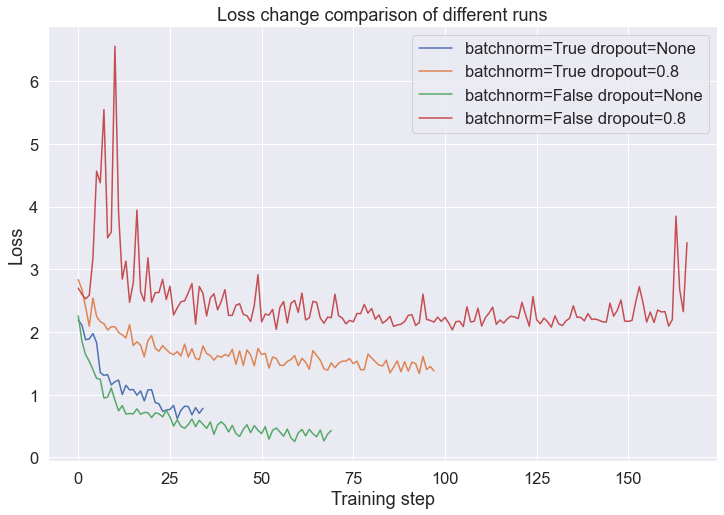

In [19]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('Training step')
ax.set_ylabel('Loss')
ax.set_title('Loss change comparison of different runs')
for k_batch, k_drop in results.keys():
    values = results[(k_batch, k_drop)]
    ax.plot(values, label=f'batchnorm={k_batch} dropout={k_drop}')
plt.legend()
plt.show()

In [68]:
acc_results = {(False, None, 'train'): 0.849645,
              (False, None, 'validation'): 0.87991,
              (False, None, 'test'): 0.8472,
              (True, None, 'train'): 0.91460,
              (True, None, 'validation'): 0.91075,
              (True, None, 'test'): 0.9084,
              (False, 0.8, 'train'): 0.43772,
              (False, 0.8, 'validation'): 0.44591,
              (False, 0.8, 'test'): 0.443,
              (True, 0.8, 'train'): 0.48460,
              (True, 0.8, 'validation'): 0.48666,
              (True, 0.8, 'test'): 0.4794}

In [69]:
list(acc_results.values())

[0.849645,
 0.87991,
 0.8472,
 0.9146,
 0.91075,
 0.9084,
 0.43772,
 0.44591,
 0.443,
 0.4846,
 0.48666,
 0.4794]

In [70]:
acc_results = {'batchnorm':[False, False, False, True, True, True,False, False, False, True, True, True],
              'dropout':[None, None, None, None, None, None, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
              'type':['train', 'validation', 'test', 'train', 'validation', 'test', 'train', 'validation', 'test', 'train', 'validation', 'test'],
              'accuracy': list(acc_results.values())}

In [71]:
df = pd.DataFrame(acc_results)
df = df.fillna(1)
df

,batchnorm,dropout,type,accuracy
0,False,1.0,train,0.849645
1,False,1.0,validation,0.879910
2,False,1.0,test,0.847200
3,True,1.0,train,0.914600
4,True,1.0,validation,0.910750
5,True,1.0,test,0.908400
6,False,0.8,train,0.437720
7,False,0.8,validation,0.445910
8,False,0.8,test,0.443000
9,True,0.8,train,0.484600


In [78]:
df[df['batchnorm'].eq(False)]

,batchnorm,dropout,type,accuracy
0,False,1.0,train,0.849645
1,False,1.0,validation,0.879910
2,False,1.0,test,0.847200
6,False,0.8,train,0.437720
7,False,0.8,validation,0.445910
8,False,0.8,test,0.443000


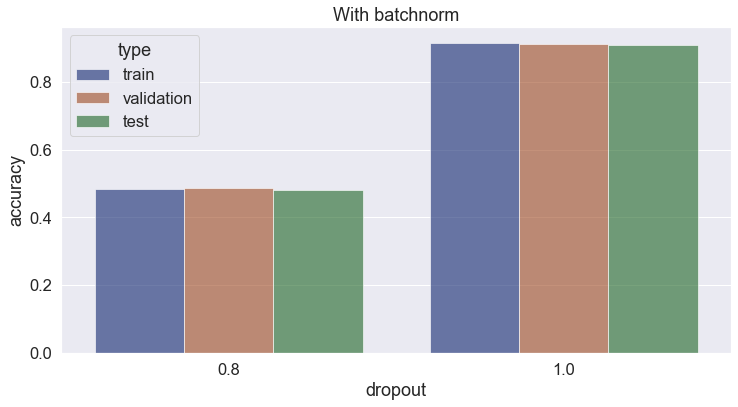

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=df[df['batchnorm'].eq(True)],
    x="dropout", y="accuracy", hue="type",
    ci="sd", palette="dark", alpha=.6, ax=ax
)
ax.set_title('With batchnorm')
g.despine(left=True)
g.set_axis_labels("Dropout probability", "Accuracy")
g.legend.set_title("Type")

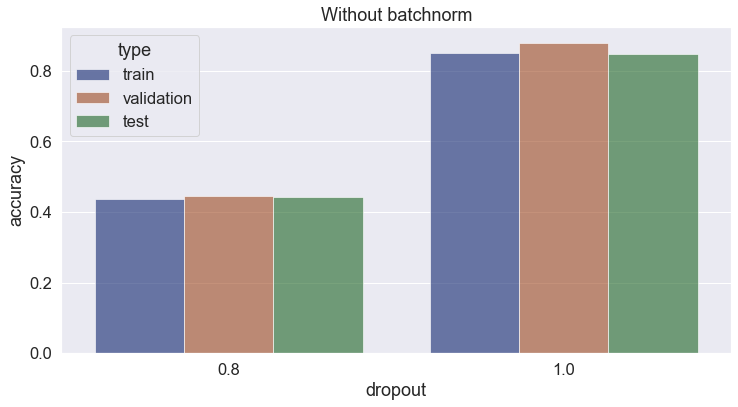

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=df[df['batchnorm'].eq(False)],
    x="dropout", y="accuracy", hue="type",
    ci="sd", palette="dark", alpha=.6, ax=ax
)
ax.set_title('Without batchnorm')
g.despine(left=True)
g.set_axis_labels("Dropout probability", "Accuracy")
g.legend.set_title("Type")

In [75]:
np.random.rand(10)

array([0.03037442, 0.74186263, 0.50686414, 0.20942656, 0.11113995,
       0.56372767, 0.19528993, 0.01262205, 0.60703439, 0.37291022])